In [1]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.12

In [3]:
!kaggle competitions download -c tensorflow-great-barrier-reef

100% 14.2G/14.2G [05:09<00:00, 80.2MB/s]
100% 14.2G/14.2G [05:09<00:00, 49.2MB/s]


In [ ]:
!unzip /content/tensorflow-great-barrier-reef.zip -d /content/datasets

In [5]:
!rm -rf "/content/tensorflow-great-barrier-reef.zip"

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
!cd yolov5
!pip install -r /content/yolov5/requirements.txt  # install

In [7]:
import pandas as pd
import numpy
import cv2
from IPython.display import display
import matplotlib.pyplot as plt

In [9]:
train = pd.read_csv("/content/datasets/train.csv", index_col="image_id")
train.head(10)

video_id  sequence  video_frame  sequence_frame annotations
image_id                                                             
0-0              0     40258            0               0          []
0-1              0     40258            1               1          []
0-2              0     40258            2               2          []
0-3              0     40258            3               3          []
0-4              0     40258            4               4          []
0-5              0     40258            5               5          []
0-6              0     40258            6               6          []
0-7              0     40258            7               7          []
0-8              0     40258            8               8          []
0-9              0     40258            9               9          []

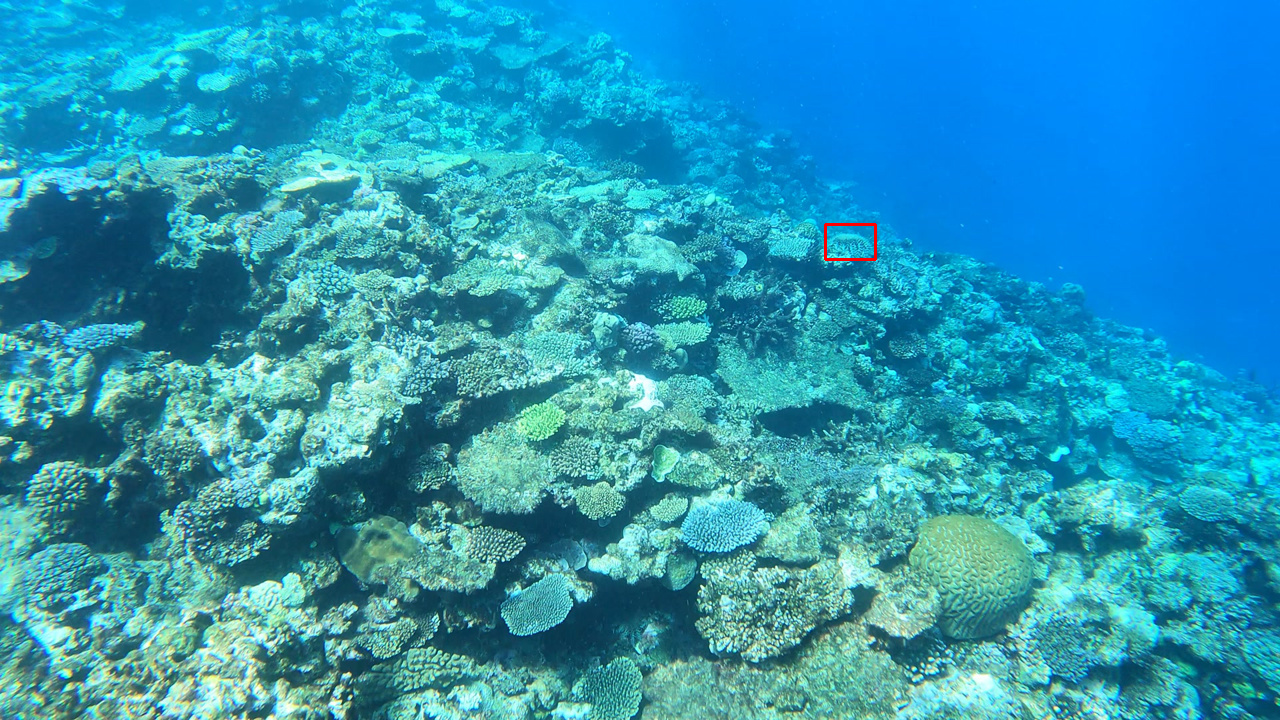

(720, 1280, 3)


In [10]:
img = cv2.imread("/content/datasets/train_images/video_0/978.jpg")
from google.colab.patches import cv2_imshow

start_pt = (825, 224)
end_pt = (875, 259)
color = (0, 0, 255)
thickness = 2
image = cv2.rectangle(img, start_pt, end_pt, color, thickness)
cv2_imshow(image)
print(image.shape)

In [12]:
import os
import ast
import shutil

!mkdir -p datasets/coral/labels
!mkdir -p datasets/coral/images

path_to_txt_folder = "/content/datasets/coral/labels"
final_path_to_images = "/content/datasets/coral/images"

def txt_data(path):
  for folder in os.listdir(path):
    path_to_folder = os.path.join(path, folder)
    _, video_id = folder.split("_")

    for image in os.listdir(path_to_folder):
      path_to_image = os.path.join(path_to_folder, image)
      
      image_id, img_ext = image.split(".")
      image_match = video_id + "-" + image_id
      
      img_temp = cv2.imread(path_to_image)
      height, width, channels = img_temp.shape
      
      image_data = train.loc[image_match]
      annotation_list = ast.literal_eval(image_data.annotations)

      if bool(annotation_list) == True:
        path_to_file = os.path.join(path_to_txt_folder, image_match + ".txt")
        file_ = open(path_to_file, "w")
        for i in annotation_list:
          x_min = i['x']
          y_min = i['y']
          box_width = i['width']
          box_height = i['height']
          class_label=str(1)
          x_min = str(round(x_min/width, 10))
          y_min = str(round(y_min/height, 10))
          box_width = str(round(box_width/width, 10))
          box_height = str(round(box_height/height, 10))
          file_.write(class_label+" "+x_min+" "+y_min+" "+box_width+" "+" "+box_height)
        file_.close()
    
      image_new_name = os.path.join(path_to_folder, image_match + "." + img_ext)
      os.rename(path_to_image, image_new_name)
      shutil.move(image_new_name, final_path_to_images)

txt_data("/content/datasets/train_images")

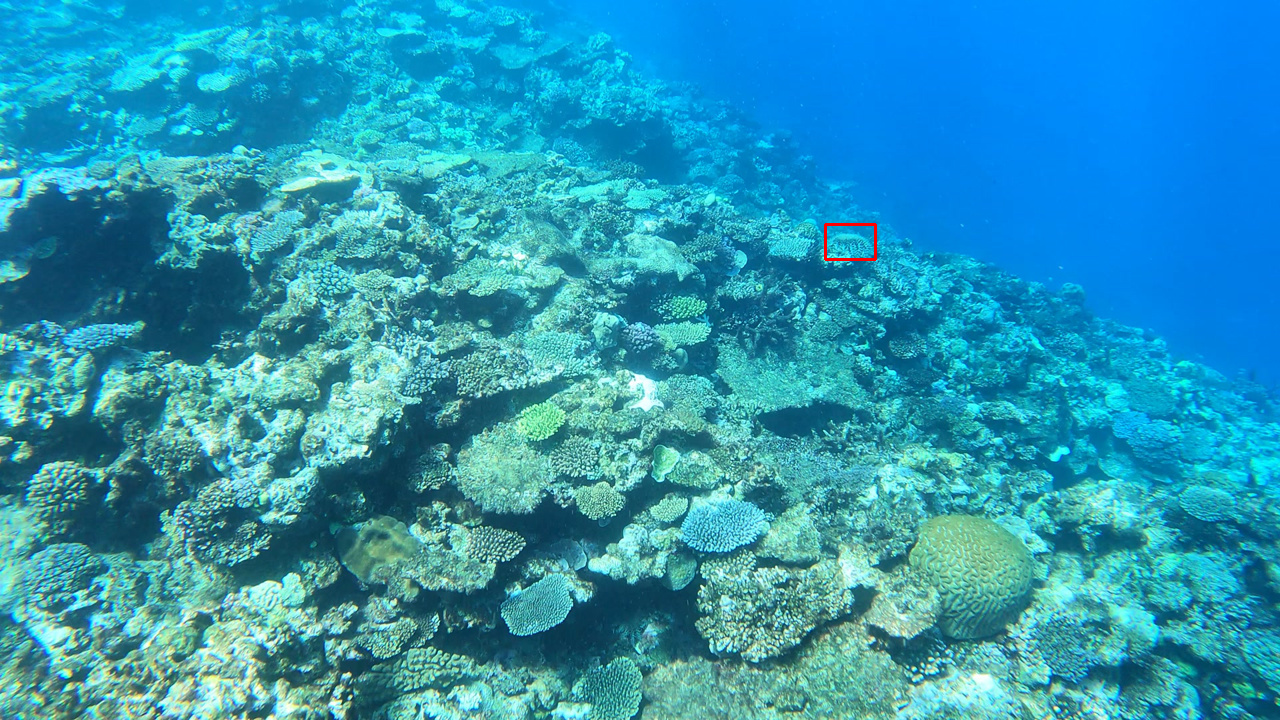

(720, 1280, 3)


In [13]:
img = cv2.imread("/content/datasets/coral/images/0-978.jpg")
from google.colab.patches import cv2_imshow

start_pt = (825, 224)
end_pt = (875, 259)
color = (0, 0, 255)
thickness = 2
image = cv2.rectangle(img, start_pt, end_pt, color, thickness)
cv2_imshow(image)
print(image.shape)

In [25]:
# Train YOLOv5m on coral_dataset for 3 epochs
!python /content/yolov5/train.py --img 1280 --batch 8 --epochs 3 --data /content/yolov5/data/coral.yaml --weights yolov5m.pt

train: weights=yolov5m.pt, cfg=, data=/content/yolov5/data/coral.yaml, hyp=yolov5/data/hyps/hyp.scratch.yaml, epochs=3, batch_size=8, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-211-g16563ac torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degree